# DATA.ML.100 Introduction to Pattern Recognition and Machine Learning

## Exercise 2 Visual classication (CIFAR-10 dataset)

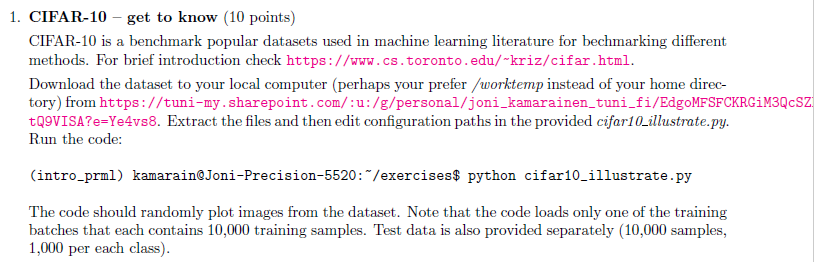

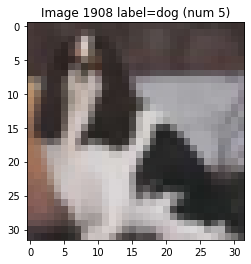

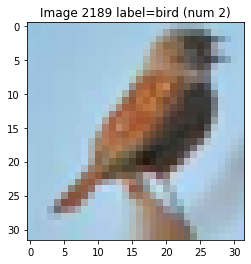

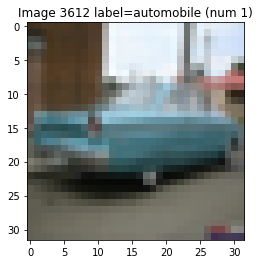

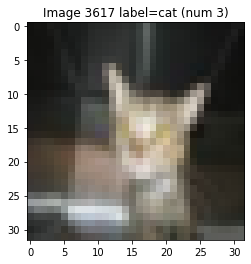

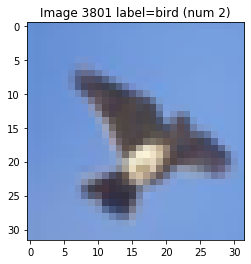

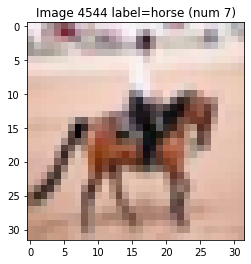

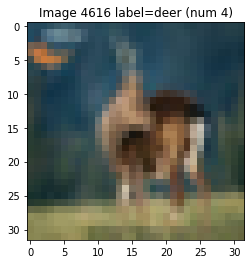

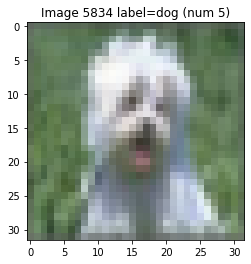

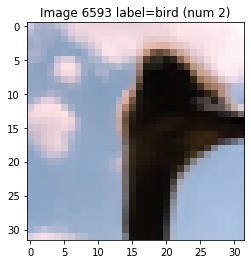

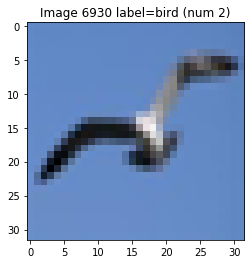

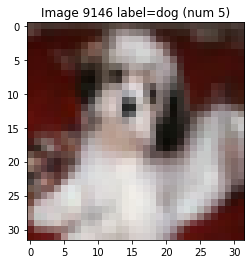

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

#datadict = unpickle('/home/kamarain/Data/cifar-10-batches-py/data_batch_1')
datadict = unpickle('test_batch')

X = datadict["data"]
Y = datadict["labels"]

labeldict = unpickle('batches.meta')
label_names = labeldict["label_names"]

X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

for i in range(X.shape[0]):
    # Show some images randomly
    if random() > 0.999:
        plt.figure(1);
        plt.clf()
        plt.imshow(X[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)


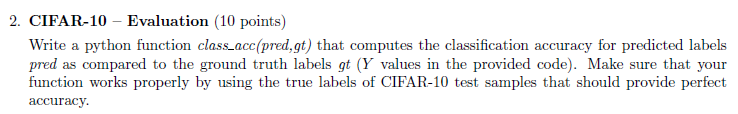

In [3]:
def class_acc(pred, gt):
    accuracy_count = 0
    for i in range(pred.size):
        if pred[i] == gt[i]:
            accuracy_count += 1
    accu_percent= (accuracy_count/gt.size)*100 
    return  accu_percent

accuracy_prediction= class_acc(Y, Y)
print('Class accuracy: {:.2f}%'.format(accuracy_prediction))

Class accuracy: 100.00%


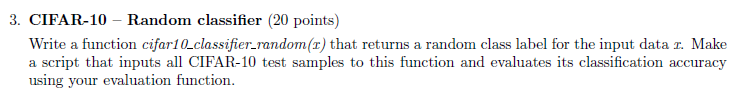

In [4]:
import random
def cifar10_classifier_random(x):
    ran_label = []  
    for i in range(x.shape[0]):
        ran_label.append(random.randint(0, 9))        

    n_label = np.asarray(ran_label).reshape(10000, 1)
    x_n_label = np.concatenate((x, n_label), axis=1)
    return x_n_label

In [5]:
%%time
testdic = unpickle('test_batch') 
test_data = (testdic['data']).astype('int32') 
test_label = np.array(testdic["labels"])
pred_random_labels = cifar10_classifier_random(test_data) 

cla_accuracy = class_acc(pred_random_labels[:, -1], test_label) 
print('Classication accuracy: {:.2f}%'.format(cla_accuracy))


Classication accuracy: 10.50%
Wall time: 189 ms


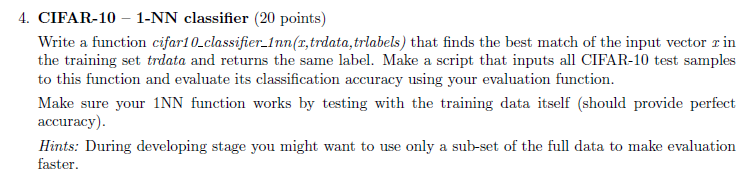

In [9]:
def cifar10_classifier_1nn(x, trdata, trlabels):
    d = np.abs(x - trdata)
    sums = np.sum(d, axis=1)
    prediction_l = trlabels[np.argmin(sums)]
    return prediction_l

In [10]:
train_dict = unpickle('data_batch_1')
train_data = train_dict['data']
train_labels = np.array(train_dict['labels'])
prediction_labels = np.zeros_like(training_labels)

for i, row_data in enumerate(train_data):
    prediction_labels[i] = cifar10_classifier_1nn(row_data, train_data, training_labels)

nnaccuarcy = class_acc(prediction_labels, training_labels)
print('1NN Classication accuracy: {:.2f}%'.format(nnaccuarcy ))

1NN Classication accuracy: 100.00%


In [11]:
train_dict = unpickle('data_batch_2')
train_data = train_dict['data']
train_labels = np.array(train_dict['labels'])
prediction_labels = np.zeros_like(train_labels)

for i, row_data in enumerate(train_data):
    prediction_labels[i] = cifar10_classifier_1nn(row_data, train_data, train_labels)

nnaccuarcy = class_acc(prediction_labels, train_labels)
print('1NN Classication accuracy: {:.2f}%'.format(nnaccuarcy ))

1NN Classication accuracy: 100.00%


In [ ]:
%%time

train_data = (np.concatenate([unpickle('data_batch_' + str(i))['data'] for i in range(1, 6)], axis=0)).astype('int32')
train_labels = np.hstack(np.array(([unpickle('data_batch_' + str(i))['labels'] for i in range(1, 6)])))
pred_labels = np.zeros_like(test_label[0:1000])

for i, row_data in enumerate(test_data[0:2000, :]):
    pred_labels[i] = cifar10_classifier_1nn(row_data, train_data, train_labels)

nnaccuarcy = class_acc( pred_labels, test_label[0:2000])
print('1NN Classication accuracy: {:.2f}%'.format(nnaccuarcy ))


1NN Classication accuracy: 39.60%